In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
# path = "/content/gdrive/MyDrive/dataset/"
path="../dataset new/"

In [4]:
df_users_full = pd.read_csv(path + "users.csv")
df_users1 = df_users_full[["user_id","functional_unit","department"]]
df_users = df_users1[df_users1.functional_unit == "2 - ResearchAndEngineering"]
df_users = df_users[(df_users.department != "1 - Research")]
df_users = pd.DataFrame(df_users)

In [5]:
df_users

,user_id,functional_unit,department
8,HBB0090,2 - ResearchAndEngineering,3 - Engineering
10,QCF0390,2 - ResearchAndEngineering,3 - Engineering
11,JDD0087,2 - ResearchAndEngineering,3 - Engineering
12,AAN0077,2 - ResearchAndEngineering,3 - Engineering
13,GJP0098,2 - ResearchAndEngineering,3 - Engineering
...,...,...,...
17318,KRM0241,2 - ResearchAndEngineering,3 - Engineering
17320,ORC0907,2 - ResearchAndEngineering,2 - SoftwareManagement
17325,REM0274,2 - ResearchAndEngineering,3 - Engineering
17332,QKA0388,2 - ResearchAndEngineering,3 - Engineering


In [6]:
df_users = df_users.dropna(axis = 0)
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3991 entries, 8 to 17333
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          3991 non-null   object
 1   functional_unit  3991 non-null   object
 2   department       3991 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [7]:
df_device_init = pd.read_csv(path + "device.csv")
df_device, df_device_test = train_test_split(df_device_init,test_size=0.2, random_state=42)
df_device_test.to_csv('../testing/device_test.csv')

In [8]:
df_file_init = pd.read_csv(path + "file.csv")
df_file, df_file_test = train_test_split(df_file_init,test_size=0.2, random_state=42)
df_file_test.to_csv('../testing/file_test.csv')

In [9]:
df_logon_init = pd.read_csv(path + "logon.csv")
df_logon, df_logon_test = train_test_split(df_logon_init,test_size=0.2, random_state=42)
df_logon_test.to_csv('../testing/logon_test.csv')

In [10]:
df_psychometric_init = pd.read_csv(path + "psychometric.csv")
df_psychometric_init = df_psychometric_init[['employee_name','user_id','O','C','E', 'A', 'N']]
df_psychometric, df_psychometric_test = train_test_split(df_psychometric_init,test_size=0.2, random_state=42)
df_psychometric_test.to_csv('../testing/psychometric_test.csv')

In [11]:
df_users_clean = df_users.rename(columns= {'user_id':'user'}, inplace=False)

In [12]:
df_logon_users = pd.merge(df_logon, df_users_clean, on = 'user')
df_logon_users_clean = df_logon_users.drop(columns=['functional_unit', 'department'])


In [13]:
df_device_users = pd.merge(df_device, df_users_clean, on='user')
df_device_users_clean = df_device_users.drop(columns=['functional_unit','department'])

In [14]:
df_device_users = pd.merge(df_device, df_users_clean, on = 'user')
df_device_users_clean = df_device_users.drop(columns = ['functional_unit', 'department'])


In [15]:
df_file_users = pd.merge(df_file, df_users_clean, on = 'user')
df_file_users_clean = df_file_users.drop(columns = ['functional_unit', 'department'])


In [16]:
df_psychometric_users = pd.merge(df_psychometric, df_users, on = 'user_id')
df_psychometric_users_clean = df_psychometric_users[['employee_name', 'user_id','O', 'C', 'E','A','N']]


In [17]:
df_logon_users_clean['date'] = pd.to_datetime(df_logon_users_clean['date'])

In [18]:
df_logon_users_clean['time'] = df_logon_users_clean['date'].dt.time

In [19]:
df_user_logon = df_logon_users_clean.loc[df_logon_users_clean['activity'] == 'Logon']

In [20]:
df_user_logon['hour'] = pd.to_datetime(df_user_logon['date'], format='%H:%M').dt.hour

/tmp/ipykernel_4818/1930962928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_logon['hour'] = pd.to_datetime(df_user_logon['date'], format='%H:%M').dt.hour


In [21]:
df_user_logon_stats = df_user_logon.groupby('user')['time'].agg([min,max]).reset_index()

In [22]:
df_logon_mode = df_user_logon.groupby('user')['time'].agg(lambda x: x.value_counts().index[0]).reset_index()

In [23]:
df_logon_mean = df_user_logon.groupby('user')['hour'].mean().reset_index()
df_logon_mean['hour'].dtype
df_logon_mean['hour'] = pd.to_datetime(df_logon_mean['hour'], format='%H').dt.time


In [24]:
df_user_logon_stats['mode'] = df_logon_mode['time']
df_user_logon_stats['mean'] = df_logon_mean['hour']

In [25]:
df_user_logoff = df_logon_users_clean.loc[df_logon_users_clean['activity'] == 'Logoff']

In [26]:
df_user_logoff['date'] = pd.to_datetime(df_user_logoff['date'])
df_user_logoff['time'] = df_user_logoff['date'].dt.time

/tmp/ipykernel_4818/636462469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_logoff['date'] = pd.to_datetime(df_user_logoff['date'])
/tmp/ipykernel_4818/636462469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_logoff['time'] = df_user_logoff['date'].dt.time


In [27]:

df_user_logoff['hour'] = pd.to_datetime(df_user_logoff['date'], format='%H:%M').dt.hour

/tmp/ipykernel_4818/1504136962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_logoff['hour'] = pd.to_datetime(df_user_logoff['date'], format='%H:%M').dt.hour


In [28]:
df_user_logoff_stats = df_user_logoff.groupby('user')['time'].agg([min,max]).reset_index()

In [29]:
df_user_logoff.groupby('user')['time'].agg(pd.Series.mode).reset_index()

,user,time
0,AAN0077,17:00:00
1,AAW0103,16:14:00
2,ACE0265,16:06:00
3,ACL0394,17:15:00
4,ADR0362,16:45:00
...,...,...
225,XTM0246,17:00:00
226,YJT0368,16:45:00
227,YSB0779,16:45:00
228,ZBL0379,19:30:00


In [30]:
df_logoff_mode = df_user_logoff.groupby('user')['time'].agg(lambda x: x.value_counts().index[0]).reset_index()

In [31]:
df_logoff_mean = df_user_logoff.groupby('user')['hour'].mean().reset_index()
df_logoff_mean['hour'] = df_logoff_mean['hour'].astype(int)
df_logoff_mean['hour'] = pd.to_datetime(df_logoff_mean['hour'], format='%H').dt.time


In [32]:
df_user_logoff_stats['mode'] = df_logoff_mode['time']
df_user_logoff_stats['mean'] = df_logoff_mean['hour']

In [33]:
df_device_users_clean['time'] = pd.to_datetime(df_device_users_clean['date']).dt.time

In [34]:
df_device_conn = df_device_users_clean.loc[df_device_users_clean['activity'] == 'Connect']
df_device_disconn = df_device_users_clean.loc[df_device_users_clean['activity'] == 'Disconnect']


In [35]:
df_device_conn_stats = df_device_conn.groupby('user')['time'].agg([min, max]).reset_index()

In [36]:
df_device_conn_stats_1 = df_device_conn.groupby('user')

In [37]:
df_conn_mode = df_device_conn.groupby('user')['time'].agg(lambda x: x.value_counts().index[0]).reset_index()

In [38]:
df_device_conn['hour'] = pd.to_datetime(df_device_conn['date']).dt.hour

/tmp/ipykernel_4818/2737355688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_device_conn['hour'] = pd.to_datetime(df_device_conn['date']).dt.hour


In [39]:
df_conn_mean = df_device_conn.groupby('user')['hour'].mean().reset_index()
df_conn_mean['hour'] = df_conn_mean['hour'].astype(int)
df_conn_mean['hour'] = pd.to_datetime(df_conn_mean['hour'],format="%H").dt.time

In [40]:
df_device_conn_stats['mode'] = df_conn_mode['time']
df_device_conn_stats['mean'] = df_conn_mean['hour']

In [41]:
df_device_disconn_stats = df_device_disconn.groupby('user')['time'].agg([min,max]).reset_index()

In [42]:
df_dconn_mode = df_device_disconn.groupby('user')['time'].agg(lambda x: x.value_counts().index[0]).reset_index()



In [43]:
df_device_disconn['hour'] = pd.to_datetime(df_device_disconn['date']).dt.hour


/tmp/ipykernel_4818/1753353138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_device_disconn['hour'] = pd.to_datetime(df_device_disconn['date']).dt.hour


In [44]:
df_dconn_mean = df_device_disconn.groupby('user')['hour'].mean().reset_index()
df_dconn_mean['hour'] = df_dconn_mean['hour'].astype(int)
df_dconn_mean['hour'] = pd.to_datetime(df_dconn_mean['hour'], format='%H').dt.time


In [45]:
df_dconn_mean

,user,hour
0,AJQ0376,14:00:00
1,AJR0231,11:00:00
2,AOD0066,12:00:00
3,ARH0777,12:00:00
4,BCP0247,12:00:00
5,BDS0396,13:00:00
6,BMS0057,14:00:00
7,BZK0095,11:00:00
8,CAE0080,13:00:00
9,CGH0088,12:00:00


In [46]:
df_device_disconn_stats['mode'] = df_dconn_mode['time']
df_device_disconn_stats['mean'] = df_dconn_mean['hour']

In [47]:
df_file_users_clean['date2'] = pd.to_datetime(df_file_users_clean['date']).dt.date

In [48]:
df_files_per_day = df_file_users_clean.groupby(['user', 'date2']).size().reset_index()

In [49]:
df_files_per_day.rename(columns={0:'transfers_per_day'}, inplace=True)


In [50]:
df_files_max_per_day = df_files_per_day.groupby('user')['transfers_per_day'].agg(max).reset_index()
df_files_max_per_day.rename(columns={'transfers_per_day': "max_transfers_per_user"}, inplace=True)

In [51]:
df_files_mode_per_day = df_files_per_day.groupby('user')['transfers_per_day'].agg(lambda x: x.value_counts().index[0]).reset_index()
df_files_mode_per_day.rename(columns={'transfers_per_day': "mode_transfers_per_user"}, inplace=True)


In [52]:
df_files_mode_per_day

,user,mode_transfers_per_user
0,AJQ0376,342
1,AJR0231,54
2,AOD0066,24
3,ARH0777,36
4,BCP0247,54
5,BDS0396,36
6,BMS0057,36
7,BZK0095,396
8,CAE0080,36
9,CGH0088,18


In [53]:
df_files_stats = df_files_mode_per_day

In [54]:
df_files_stats_new = pd.DataFrame()
df_files_stats_new['user'] = df_files_stats['user']
df_files_stats_new['mode_trasfers_per_user'] = df_files_stats['mode_transfers_per_user']
df_files_stats_new['max_transfers_per_user'] = df_files_max_per_day['max_transfers_per_user']


In [55]:
df_user_pc = df_logon_users_clean.groupby(['user','pc',]).agg(pc_visits_per_user_total = pd.NamedAgg(column = 'pc', aggfunc = 'count')).reset_index()
df_user_pc['count'] = df_user_pc.groupby(['user'])['pc'].transform('nunique')
df_user_pc = df_user_pc.drop(['pc', 'pc_visits_per_user_total'], axis=1)
df_user_pc = df_user_pc.drop_duplicates()

In [56]:
df_user_pc

,user,count
0,AAN0077,1
1,AAW0103,1
2,ACE0265,1
3,ACL0394,2
5,ADR0362,1
...,...,...
622,XTM0246,1
623,YJT0368,2
625,YSB0779,1
626,ZBL0379,1


In [57]:
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [58]:
df_user_pc_count = np.array(df_user_pc['count'])

In [59]:
df_user_pc_ct = df_user_pc_count.reshape(-1,1)

In [60]:
df_user_pc.columns

Index(['user', 'count'], dtype='object')

In [61]:
#user pc
forest = IsolationForest(bootstrap=False, contamination=0.1,max_features=1.0,
                         max_samples='auto',n_estimators=100, n_jobs=1, random_state=None,
                         verbose=0)
forest.fit(df_user_pc_ct)


IsolationForest(contamination=0.1, n_jobs=1)

In [62]:
import pickle 
with open('../pkl/user_pc_ct.pkl','wb') as file :
  pickle.dump(forest, file)

In [63]:
graph_a_score = forest.decision_function(df_user_pc_ct)
print(graph_a_score[1:10])

[0.09012279 0.09012279 0.         0.09012279 0.09012279 0.09012279
 0.09012279 0.09012279 0.09012279]


In [64]:
graph_result = pd.DataFrame()
graph_result['user'] = df_user_pc['user']
graph_result['ascore'] = graph_a_score
# graph_result.to_csv('user_pc_ct.csv')
print(graph_result)

        user    ascore
0    AAN0077  0.090123
1    AAW0103  0.090123
2    ACE0265  0.090123
3    ACL0394  0.000000
5    ADR0362  0.090123
..       ...       ...
622  XTM0246  0.090123
623  YJT0368  0.000000
625  YSB0779  0.090123
626  ZBL0379  0.090123
627  ZIF0269  0.090123

[230 rows x 2 columns]


In [65]:
outliers = graph_result.loc[graph_result['ascore'] < 0]
print(outliers)

        user    ascore
14   AJR0231 -0.235827
52   ALC0100 -0.145159
93   ARH0777 -0.176816
107  BGZ0902 -0.277596
149  CGH0088 -0.176816
162  CQS0899 -0.254850
199  DNS0397 -0.239234
212  EER0383 -0.145159
248  FED0275 -0.275500
394  LWB0078 -0.361718
480  PYT0264 -0.217535
571  WJP0386 -0.284980
583  WMP0272 -0.197126


In [66]:
def dtt2timestamp(dtt):
  time_in_sec = (dtt.hour*60 + dtt.minute) * 60 + dtt.second
  return time_in_sec

In [67]:
df_user_logon_stats_sec = df_user_logon_stats


In [68]:
min_ts = [dtt2timestamp(dtt) for dtt in df_user_logon_stats_sec['min']]
max_ts = [dtt2timestamp(dtt) for dtt in df_user_logon_stats_sec['max']]
mode_ts = [dtt2timestamp(dtt) for dtt in df_user_logon_stats_sec['mode']]
mean_ts = [dtt2timestamp(dtt) for dtt in df_user_logon_stats_sec['mean']]

In [69]:
df_user_logon_stats_sec['min_ts'] = min_ts
df_user_logon_stats_sec['max_ts'] = max_ts
df_user_logon_stats_sec['mode_ts'] = mode_ts
df_user_logon_stats_sec['mean_ts'] = mean_ts

In [70]:
df_user_logon_stats_sec.drop(['min','max','mode','mean'], axis=1)

,user,min_ts,max_ts,mode_ts,mean_ts
0,AAN0077,27900,29580,29220,25200
1,AAW0103,25200,26280,26100,25200
2,ACE0265,28800,30300,30240,28800
3,ACL0394,32400,59289,33300,32400
4,ADR0362,27000,28080,28080,25200
...,...,...,...,...,...
225,XTM0246,27900,29520,28800,25200
226,YJT0368,27000,66246,27900,25200
227,YSB0779,27000,28020,27900,25200
228,ZBL0379,29700,52585,30600,36000


In [71]:
df_user_logoff_stats_sec = df_user_logoff_stats


In [72]:
min_ts = [dtt2timestamp(dtt) for dtt in df_user_logoff_stats_sec['min']] 
max_ts = [dtt2timestamp(dtt) for dtt in df_user_logoff_stats_sec['max']]
mode_ts = [dtt2timestamp(dtt) for dtt in df_user_logoff_stats_sec['mode']]
mean_ts = [dtt2timestamp(dtt) for dtt in df_user_logoff_stats_sec['mean']]

In [73]:
df_user_logoff_stats_sec['min_ts'] = min_ts
df_user_logoff_stats_sec['max_ts'] = max_ts
df_user_logoff_stats_sec['mode_ts'] = mode_ts
df_user_logoff_stats_sec['mean_ts'] = mean_ts

In [74]:
df_user_logoff_stats_sec.drop(['min', 'max','mode','mean'], axis=1)

,user,min_ts,max_ts,mode_ts,mean_ts
0,AAN0077,60420,62100,61200,57600
1,AAW0103,58320,59400,58440,57600
2,ACE0265,57900,59400,57960,57600
3,ACL0394,33235,63000,62100,57600
4,ADR0362,60120,61200,60300,57600
...,...,...,...,...,...
225,XTM0246,60480,62100,61200,57600
226,YJT0368,27293,66362,60300,54000
227,YSB0779,60180,61200,60300,57600
228,ZBL0379,69420,71100,70200,68400


In [75]:
df_log_on_off_stats = pd.DataFrame()

df_log_on_off_stats['user'] = df_user_logon_stats_sec['user']
df_log_on_off_stats['on_min_ts'] = df_user_logon_stats_sec['min_ts']
df_log_on_off_stats['on_max_ts'] = df_user_logon_stats_sec['max_ts']
df_log_on_off_stats['on_mode_ts'] = df_user_logon_stats_sec['mode_ts']
df_log_on_off_stats['on_mean_ts'] = df_user_logon_stats_sec['mean_ts']
df_log_on_off_stats['off_min_ts'] = df_user_logon_stats_sec['min_ts']
df_log_on_off_stats['off_max_ts'] = df_user_logon_stats_sec['max_ts']
df_log_on_off_stats['off_mode_ts'] = df_user_logon_stats_sec['mode_ts']
df_log_on_off_stats['off_mean_ts'] = df_user_logon_stats_sec['mean_ts']

In [76]:
df_log_on_off_stats.dtypes

user           object
on_min_ts       int64
on_max_ts       int64
on_mode_ts      int64
on_mean_ts      int64
off_min_ts      int64
off_max_ts      int64
off_mode_ts     int64
off_mean_ts     int64
dtype: object

In [77]:
log_stats = df_log_on_off_stats.drop(['user'], axis = 1)
log_stats_matrix = np.matrix(log_stats)
print(log_stats_matrix)

[[27900 29580 29220 ... 29580 29220 25200]
 [25200 26280 26100 ... 26280 26100 25200]
 [28800 30300 30240 ... 30300 30240 28800]
 ...
 [27000 28020 27900 ... 28020 27900 25200]
 [29700 52585 30600 ... 52585 30600 36000]
 [25200 26760 26100 ... 26760 26100 25200]]


In [78]:
df_log_on_off_stats.columns

Index(['user', 'on_min_ts', 'on_max_ts', 'on_mode_ts', 'on_mean_ts',
       'off_min_ts', 'off_max_ts', 'off_mode_ts', 'off_mean_ts'],
      dtype='object')

In [79]:
#logon
forest = IsolationForest(bootstrap=False, contamination= 0.1 , max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=0,
        verbose=0)
forest.fit(log_stats_matrix)
log_ascore = forest.decision_function(log_stats_matrix)
log_ascore[:10]

array([0.08320784, 0.09802686, 0.10074721, 0.02524947, 0.13713674,
       0.17745041, 0.15477641, 0.16289324, 0.13325635, 0.055631  ])

In [80]:
# counting the values
df22 = pd.Series(forest.predict(log_stats_matrix))
df22 = df22.map({1:0, -1:1})
print(df22.value_counts())

0    207
1     23
dtype: int64


In [81]:
import pickle 
with open('../pkl/log_stats_matrix.pkl','wb') as file :
  pickle.dump(forest, file)

In [82]:
df_user_log_result = pd.DataFrame()
df_user_log_result['user'] = df_user_logoff_stats_sec['user']
df_user_log_result['ascore'] = log_ascore
# df_user_log_result.to_csv('user_log_result.csv')
print(df_user_log_result)


        user    ascore
0    AAN0077  0.083208
1    AAW0103  0.098027
2    ACE0265  0.100747
3    ACL0394  0.025249
4    ADR0362  0.137137
..       ...       ...
225  XTM0246  0.165602
226  YJT0368  0.019951
227  YSB0779  0.174086
228  ZBL0379  0.115757
229  ZIF0269  0.086144

[230 rows x 2 columns]


In [83]:
df_user_log_result.loc[df_user_log_result['ascore'] < 0]

,user,ascore
14,AMR0656,-0.002597
29,BKA0340,-0.001159
31,BMS0057,-0.010898
43,BZV0067,-0.016387
56,CQS0899,-0.112930
65,DJS0406,-0.041076
73,EER0383,-0.033583
77,FED0275,-0.113881
83,GFM0250,-0.051130
86,GJP0098,-0.023753


In [84]:
df_device_conn_stats_sec = df_device_conn_stats
con_min_ts = [dtt2timestamp(dtt) for dtt in df_device_conn_stats_sec['min']]
con_max_ts = [dtt2timestamp(dtt) for dtt in df_device_conn_stats_sec['max']]
con_mode_ts = [dtt2timestamp(dtt) for dtt in df_device_conn_stats_sec['mode']]
con_mean_ts = [dtt2timestamp(dtt) for dtt in df_device_conn_stats_sec['mean']]

df_device_conn_stats_sec['min_ts'] = con_min_ts
df_device_conn_stats_sec['max_ts'] = con_max_ts
df_device_conn_stats_sec['mode_ts'] = con_mode_ts
df_device_conn_stats_sec['mean_ts'] = con_mean_ts
df_device_conn_stats_sec = df_device_conn_stats_sec.drop(['min', 'max','mode','mean'], axis=1)

In [85]:
df_device_disconn_stats_sec = df_device_conn_stats
discon_min_ts = [dtt2timestamp(dtt) for dtt in df_device_disconn_stats_sec['min']]
discon_max_ts = [dtt2timestamp(dtt) for dtt in df_device_disconn_stats_sec['max']]
discon_mode_ts = [dtt2timestamp(dtt) for dtt in df_device_disconn_stats_sec['mode']]
discon_mean_ts = [dtt2timestamp(dtt) for dtt in df_device_disconn_stats_sec['mean']]

df_device_disconn_stats_sec['min_ts'] = discon_min_ts
df_device_disconn_stats_sec['max_ts'] = discon_max_ts
df_device_disconn_stats_sec['mode_ts'] = discon_mode_ts
df_device_disconn_stats_sec['mean_ts'] = discon_mean_ts
df_device_disconn_stats_sec = df_device_disconn_stats_sec.drop(['min', 'max','mode','mean'], axis=1)


In [86]:
df_device_full = pd.DataFrame()
df_device_full['user'] = df_device_conn_stats['user']

In [87]:
df_device_full['con_min_ts'] = df_device_conn_stats_sec['min_ts']
df_device_full['con_max_ts'] = df_device_conn_stats_sec['max_ts']
df_device_full['con_mode_ts'] = df_device_conn_stats_sec['mode_ts']
df_device_full['con_mean_ts'] = df_device_conn_stats_sec['mean_ts']

# disconnect stats
df_device_full['dcon_min_ts'] = df_device_disconn_stats_sec['min_ts']
df_device_full['dcon_max_ts'] = df_device_disconn_stats_sec['max_ts']
df_device_full['dcon_mode_ts'] = df_device_disconn_stats_sec['mode_ts']
df_device_full['dcon_mean_ts'] = df_device_disconn_stats_sec['mean_ts']

# files per day stats
df_device_full['file_mode'] = df_files_stats_new['mode_trasfers_per_user']
df_device_full['file_max'] = df_files_stats_new['max_transfers_per_user']

In [88]:
device_full_matrix = df_device_full.drop(['user'],axis=1)
device_params = np.matrix(device_full_matrix)
device_params[:10]

matrix([[30401, 68694, 52097, 43200, 30401, 68694, 52097, 43200,   342,
           468],
        [27463, 56918, 30520, 36000, 27463, 56918, 30520, 36000,    54,
           234],
        [27693, 55895, 31210, 36000, 27693, 55895, 31210, 36000,    24,
            72],
        [27756, 59689, 51140, 39600, 27756, 59689, 51140, 39600,    36,
           126],
        [ 4870, 83480, 31609, 39600,  4870, 83480, 31609, 39600,    54,
           198],
        [33496, 61926, 35672, 39600, 33496, 61926, 35672, 39600,    36,
           216],
        [ 1185, 76882, 56810, 46800,  1185, 76882, 56810, 46800,    36,
           162],
        [28882, 59022, 44564, 39600, 28882, 59022, 44564, 39600,   396,
           486],
        [16018, 83814, 44991, 39600, 16018, 83814, 44991, 39600,    36,
           198],
        [29154, 57723, 45511, 39600, 29154, 57723, 45511, 39600,    18,
           144]])

In [89]:
df_device_full.columns

Index(['user', 'con_min_ts', 'con_max_ts', 'con_mode_ts', 'con_mean_ts',
       'dcon_min_ts', 'dcon_max_ts', 'dcon_mode_ts', 'dcon_mean_ts',
       'file_mode', 'file_max'],
      dtype='object')

In [90]:
# device (-user)
forest = IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)
forest.fit(device_params)


IsolationForest(contamination=0.1, n_jobs=1)

In [91]:
import pickle 
with open('../pkl/device_params.pkl','wb') as file :
  pickle.dump(forest, file)

In [92]:

dev_file_ascore = forest.decision_function(device_params)
print(dev_file_ascore)

[ 0.02617247  0.09579629  0.06739464  0.13371792  0.0390894   0.10504114
 -0.06573056  0.08901924  0.03211036  0.13514658  0.100216    0.08405237
 -0.07381876  0.10881404  0.0460145   0.10827872  0.02783885  0.07989495
  0.10041519  0.03925224  0.0924164   0.09402688  0.10937815  0.11088547
  0.07908424  0.142889    0.07725592  0.14549368  0.15214872  0.00459125
  0.01040068  0.0332669   0.02117226  0.08988692  0.05246347  0.03548873
  0.0672734  -0.12831842  0.07890999  0.04728251 -0.05407012  0.07042304
  0.10641446  0.10338182  0.10113314  0.05124619 -0.00688688]


In [93]:
df_device_file_full_result = pd.DataFrame()

df_device_file_full_result['user'] = df_device_full['user']
df_device_file_full_result['ascore'] = dev_file_ascore
# df_device_file_full_result.to_csv('device_file_full_result.csv')

In [94]:
df_device_file_full_result.loc[df_device_file_full_result['ascore'] < 0] 

,user,ascore
6,BMS0057,-0.065731
12,CSD0242,-0.073819
37,QLC0248,-0.128318
40,SBM0063,-0.054070
46,ZBL0379,-0.006887


In [95]:
psychometric_matrix = df_psychometric_users_clean.drop(['user_id', 'employee_name'], axis = 1)
psychometric_params = np.matrix(psychometric_matrix)

In [96]:
# psycho ds 
forest = IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)
forest.fit(psychometric_params)

IsolationForest(contamination=0.1, n_jobs=1)

In [97]:
import pickle 
with open('../pkl/psychometric_params.pkl','wb') as file :
  pickle.dump(forest, file)

In [98]:
psych_ascore = forest.decision_function(psychometric_params)
psych_ascore[:10]

array([-0.03225943, -0.03225943, -0.03225943, -0.03225943, -0.03225943,
       -0.03225943, -0.03225943, -0.03225943, -0.03225943, -0.03225943])

In [99]:
df_psychometric_result = pd.DataFrame()

df_psychometric_result['user'] = df_psychometric_users_clean['user_id']
df_psychometric_result['ascore'] = psych_ascore
# df_psychometric_result.to_csv('psychometric_result.csv')

In [100]:
df_psychometric_result.loc[df_psychometric_result['ascore'] < 0]

,user,ascore
0,HPL0787,-0.032259
1,HPL0787,-0.032259
2,HPL0787,-0.032259
3,HPL0787,-0.032259
4,HPL0787,-0.032259
...,...,...
3118,QEB0780,-0.008165
3119,QEB0780,-0.008165
3120,QEB0780,-0.008165
3121,QEB0780,-0.008165


In [101]:
df = pd.merge(df_log_on_off_stats, df_user_pc, on='user')

In [102]:
df_1 = pd.merge(df, df_psychometric, left_on = 'user', right_on = 'user_id')

In [103]:
df_1.head()

,user,on_min_ts,on_max_ts,on_mode_ts,on_mean_ts,off_min_ts,off_max_ts,off_mode_ts,off_mean_ts,count,employee_name,user_id,O,C,E,A,N
0,AAN0077,27900,29580,29220,25200,27900,29580,29220,25200,1,Allistair Akeem Nichols,AAN0077,42,15,32,22,29
1,AAW0103,25200,26280,26100,25200,25200,26280,26100,25200,1,Alexa Allegra Walton,AAW0103,39,42,47,39,28
2,ACE0265,28800,30300,30240,28800,28800,30300,30240,28800,1,Amos Carson Emerson,ACE0265,26,23,14,19,40
3,ADR0362,27000,28080,28080,25200,27000,28080,28080,25200,1,Amir Damian Rosario,ADR0362,32,42,35,38,26
4,AEA0062,27000,28080,27900,25200,27000,28080,27900,25200,1,Angela Emerald Ashley,AEA0062,40,42,25,29,29


In [104]:
df_final = df_1.drop(['employee_name', 'user_id'], axis=1)


In [105]:
df_all_parameters = df_final

In [106]:
df_all_parameters_input = df_all_parameters.drop(['user'], axis = 1)

In [107]:
print(df_all_parameters_input)

     on_min_ts  on_max_ts  on_mode_ts  on_mean_ts  off_min_ts  off_max_ts  \
0        27900      29580       29220       25200       27900       29580   
1        25200      26280       26100       25200       25200       26280   
2        28800      30300       30240       28800       28800       30300   
3        27000      28080       28080       25200       27000       28080   
4        27000      28080       27900       25200       27000       28080   
..         ...        ...         ...         ...         ...         ...   
175      27900      29520       28800       25200       27900       29520   
176      27000      66246       27900       25200       27000       66246   
177      27000      28020       27900       25200       27000       28020   
178      29700      52585       30600       36000       29700       52585   
179      25200      26760       26100       25200       25200       26760   

     off_mode_ts  off_mean_ts  count   O   C   E   A   N  
0          29220

In [108]:
# psycho logon ds
forest = IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)
forest.fit(df_all_parameters_input)

IsolationForest(contamination=0.1, n_jobs=1)

In [109]:
import pickle 
with open('../pkl/all_parameters_input.pkl','wb') as file :
  pickle.dump(forest, file)

In [110]:
all_parameters_ascore = forest.decision_function(df_all_parameters_input)
print(all_parameters_ascore[:10])

[0.11529512 0.02668994 0.06975173 0.12321361 0.13742748 0.09718043
 0.13437682 0.04995594 0.11030782 0.03625894]


In [111]:
df_all_parameters_result = pd.DataFrame()

df_all_parameters_result['user'] = df_final['user']
df_all_parameters_result['ascore'] = all_parameters_ascore
print(df_all_parameters_result)
# df_all_parameters_result.to_csv('all_parameters_result.csv')

        user    ascore
0    AAN0077  0.115295
1    AAW0103  0.026690
2    ACE0265  0.069752
3    ADR0362  0.123214
4    AEA0062  0.137427
..       ...       ...
175  XTM0246  0.108765
176  YJT0368  0.061755
177  YSB0779  0.088046
178  ZBL0379  0.054427
179  ZIF0269  0.038898

[180 rows x 2 columns]


In [112]:
df_all_parameters_result.loc[df_all_parameters_result['ascore'] < 0]

,user,ascore
15,ASH0413,-0.001493
41,CQS0899,-0.076026
43,CSD0242,-0.007034
50,DNS0397,-0.011894
51,DYB0399,-0.011379
54,EER0383,-0.038199
57,FED0275,-0.101307
63,GFM0250,-0.048790
73,HML0060,-0.009584
76,HPL0787,-0.042799


In [113]:
df_user_log_result.head()

,user,ascore
0,AAN0077,0.083208
1,AAW0103,0.098027
2,ACE0265,0.100747
3,ACL0394,0.025249
4,ADR0362,0.137137


array([[<AxesSubplot:title={'center':'ascore'}>]], dtype=object)

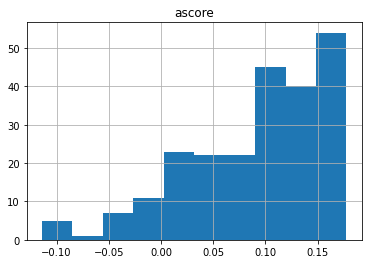

In [114]:
df_user_log_result.hist()

In [115]:
df_device_file_full_result.head()

,user,ascore
0,AJQ0376,0.026172
1,AJR0231,0.095796
2,AOD0066,0.067395
3,ARH0777,0.133718
4,BCP0247,0.039089


array([[<AxesSubplot:title={'center':'ascore'}>]], dtype=object)

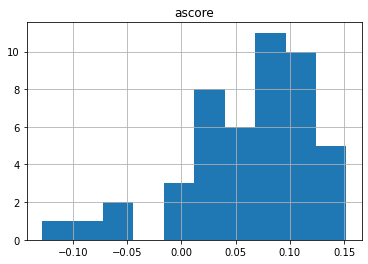

In [116]:
# df_device_file_full_result.hist(bins = 15)
df_device_file_full_result.hist()

In [117]:
df_psychometric_result.head()

,user,ascore
0,HPL0787,-0.032259
1,HPL0787,-0.032259
2,HPL0787,-0.032259
3,HPL0787,-0.032259
4,HPL0787,-0.032259


array([[<AxesSubplot:title={'center':'ascore'}>]], dtype=object)

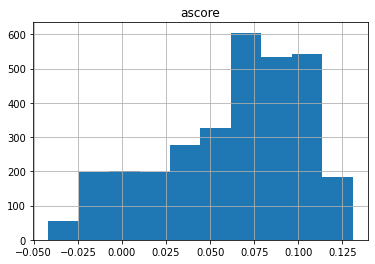

In [118]:
df_psychometric_result.hist()

In [119]:
df_all_parameters_result.head()

,user,ascore
0,AAN0077,0.115295
1,AAW0103,0.026690
2,ACE0265,0.069752
3,ADR0362,0.123214
4,AEA0062,0.137427


array([[<AxesSubplot:title={'center':'ascore'}>]], dtype=object)

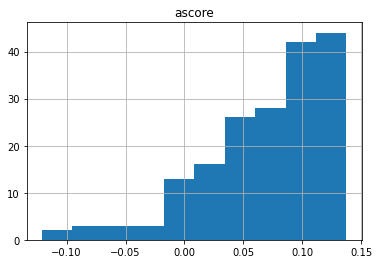

In [120]:
df_all_parameters_result.hist()

array([[<AxesSubplot:title={'center':'ascore'}>]], dtype=object)

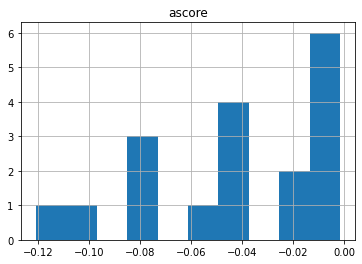

In [121]:
df_all_parameters_result.loc[df_all_parameters_result['ascore'] < 0].hist()

In [122]:
df_threat_users_all_params = df_all_parameters_result.loc[df_all_parameters_result['ascore'] < -0.065]
print(df_threat_users_all_params)

        user    ascore
41   CQS0899 -0.076026
57   FED0275 -0.101307
110  LQD0409 -0.082111
113  LWB0078 -0.120823
174  XCR0407 -0.073847


In [123]:
df_all_parameters[df_all_parameters.user.isin(df_threat_users_all_params.user)]

,user,on_min_ts,on_max_ts,on_mode_ts,on_mean_ts,off_min_ts,off_max_ts,off_mode_ts,off_mean_ts,count,O,C,E,A,N
41,CQS0899,606,85229,30600,36000,606,85229,30600,36000,26,41,38,41,24,36
57,FED0275,2462,81960,26400,28800,2462,81960,26400,28800,42,26,16,28,13,30
110,LQD0409,32400,72791,33300,39600,32400,72791,33300,39600,3,37,38,42,41,33
113,LWB0078,1104,86213,28920,28800,1104,86213,28920,28800,53,50,38,48,30,28
174,XCR0407,32400,54992,33420,39600,32400,54992,33420,39600,1,35,40,45,39,31


In [124]:
df_device_file_full_result.head()

,user,ascore
0,AJQ0376,0.026172
1,AJR0231,0.095796
2,AOD0066,0.067395
3,ARH0777,0.133718
4,BCP0247,0.039089


array([[<AxesSubplot:title={'center':'ascore'}>]], dtype=object)

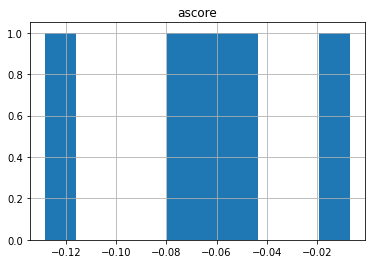

In [125]:
df_device_file_full_result.loc[df_device_file_full_result['ascore'] < 0].hist()

In [126]:
df_threat_users_device_file = df_device_file_full_result.loc[df_device_file_full_result['ascore'] <= 0]
print(df_threat_users_device_file)


       user    ascore
6   BMS0057 -0.065731
12  CSD0242 -0.073819
37  QLC0248 -0.128318
40  SBM0063 -0.054070
46  ZBL0379 -0.006887


In [127]:
df_device_full[df_device_full.user.isin(df_threat_users_device_file.user)]

,user,con_min_ts,con_max_ts,con_mode_ts,con_mean_ts,dcon_min_ts,dcon_max_ts,dcon_mode_ts,dcon_mean_ts,file_mode,file_max
6,BMS0057,1185,76882,56810,46800,1185,76882,56810,46800,36,162
12,CSD0242,514,86209,55868,39600,514,86209,55868,39600,378,594
37,QLC0248,8753,83989,82053,43200,8753,83989,82053,43200,216,468
40,SBM0063,34,85234,52145,36000,34,85234,52145,36000,126,270
46,ZBL0379,30142,69372,52348,46800,30142,69372,52348,46800,54,180


array([[<AxesSubplot:title={'center':'ascore'}>]], dtype=object)

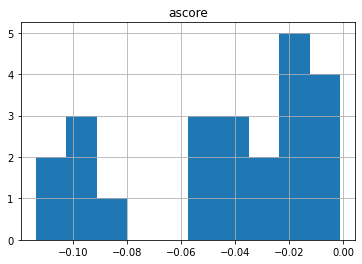

In [128]:
df_user_log_result.head()
df_user_log_result.loc[df_user_log_result['ascore'] < 0].hist()

In [129]:
df_threat_users_log = df_user_log_result.loc[df_user_log_result['ascore'] <= -0.04]
print(df_threat_users_log)

        user    ascore
56   CQS0899 -0.112930
65   DJS0406 -0.041076
77   FED0275 -0.113881
83   GFM0250 -0.051130
95   HML0060 -0.084166
144  LQD0409 -0.100517
145  LTB0107 -0.043406
147  LWB0078 -0.046083
178  RAW0533 -0.094586
180  RCG0105 -0.050467
214  VLB0069 -0.055590
223  XCR0407 -0.094866


In [130]:
df_log_on_off_stats[df_log_on_off_stats.user.isin(df_threat_users_log.user)]

,user,on_min_ts,on_max_ts,on_mode_ts,on_mean_ts,off_min_ts,off_max_ts,off_mode_ts,off_mean_ts
56,CQS0899,606,85229,30600,36000,606,85229,30600,36000
65,DJS0406,32400,33960,33720,32400,32400,33960,33720,32400
77,FED0275,2462,81960,26400,28800,2462,81960,26400,28800
83,GFM0250,464,85232,28800,25200,464,85232,28800,25200
95,HML0060,6952,84931,27900,25200,6952,84931,27900,25200
144,LQD0409,32400,72791,33300,39600,32400,72791,33300,39600
145,LTB0107,25200,48447,26700,28800,25200,48447,26700,28800
147,LWB0078,1104,86213,28920,28800,1104,86213,28920,28800
178,RAW0533,1401,71230,27900,25200,1401,71230,27900,25200
180,RCG0105,25200,58840,26400,25200,25200,58840,26400,25200


In [131]:
df_psychometric_result.head()

,user,ascore
0,HPL0787,-0.032259
1,HPL0787,-0.032259
2,HPL0787,-0.032259
3,HPL0787,-0.032259
4,HPL0787,-0.032259


array([[<AxesSubplot:title={'center':'ascore'}>]], dtype=object)

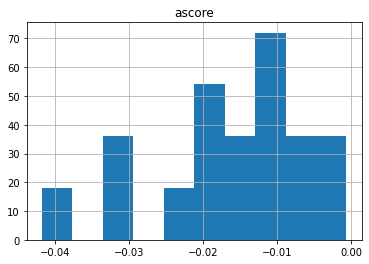

In [132]:
df_psychometric_result.loc[df_psychometric_result['ascore'] < 0].hist()

In [133]:
df_threat_psycho = df_psychometric_result.loc[df_psychometric_result['ascore'] <= -0.04]


In [134]:
df_psychometric_users_clean[df_psychometric_users_clean.user_id.isin(df_threat_psycho.user)]

,employee_name,user_id,O,C,E,A,N
848,Ariana Orla Padilla,AOP0898,12,17,50,23,31
849,Ariana Orla Padilla,AOP0898,12,17,50,23,31
850,Ariana Orla Padilla,AOP0898,12,17,50,23,31
851,Ariana Orla Padilla,AOP0898,12,17,50,23,31
852,Ariana Orla Padilla,AOP0898,12,17,50,23,31
853,Ariana Orla Padilla,AOP0898,12,17,50,23,31
854,Ariana Orla Padilla,AOP0898,12,17,50,23,31
855,Ariana Orla Padilla,AOP0898,12,17,50,23,31
856,Ariana Orla Padilla,AOP0898,12,17,50,23,31
857,Ariana Orla Padilla,AOP0898,12,17,50,23,31


In [135]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

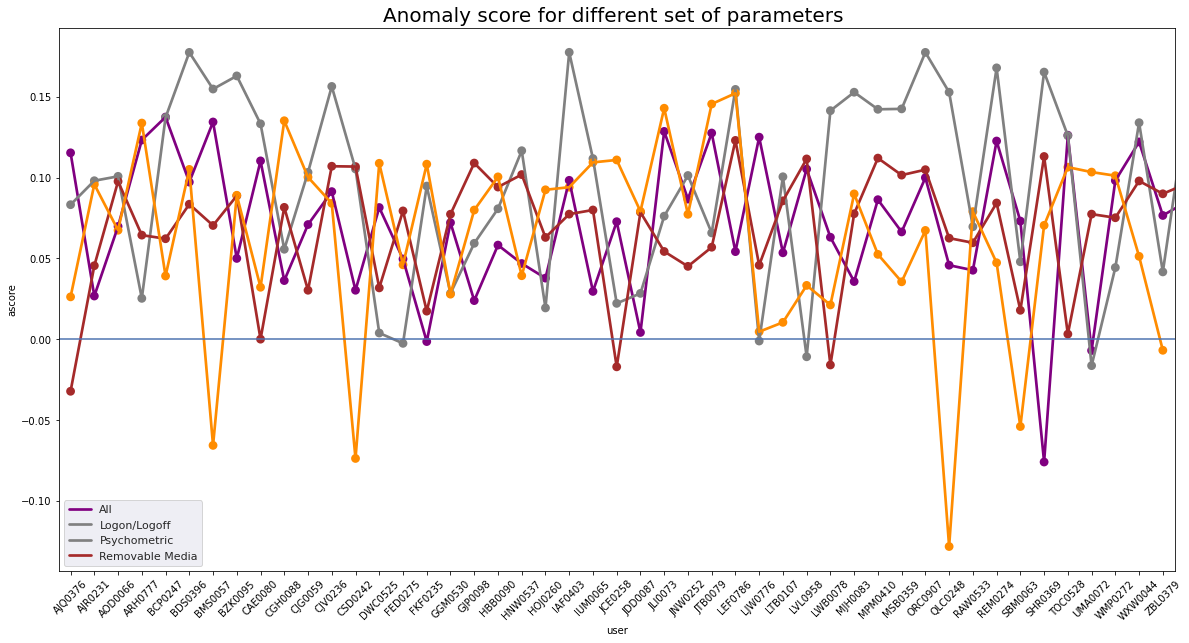

In [136]:
f, ax = plt.subplots(figsize = (20,10))
x_col='user'
y_col = 'ascore'
sns.set_theme(style="darkgrid")
sns.pointplot(ax=ax,x=x_col,y=y_col,data=df_all_parameters_result,color='purple')
sns.pointplot(ax=ax,x=x_col,y=y_col,data=df_user_log_result,color='grey')
sns.pointplot(ax=ax,x=x_col,y=y_col,data=df_psychometric_result,color='brown')
sns.pointplot(ax=ax,x=x_col,y=y_col,data=df_device_file_full_result,color='darkorange')

ax.legend(handles=ax.lines[::len(df_all_parameters_result)+1], labels=["All","Logon/Logoff","Psychometric","Removable Media"])
#ax.set_xtickslabels(rotation = 45)
ax.axhline(0, ls='-')
ax.set_title('Anomaly score for different set of parameters ', size = 20)
plt.rcParams["axes.labelsize"] = 25
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [137]:
# df_files_stats_new.to_csv('file_stats_new')     #CHARTJS

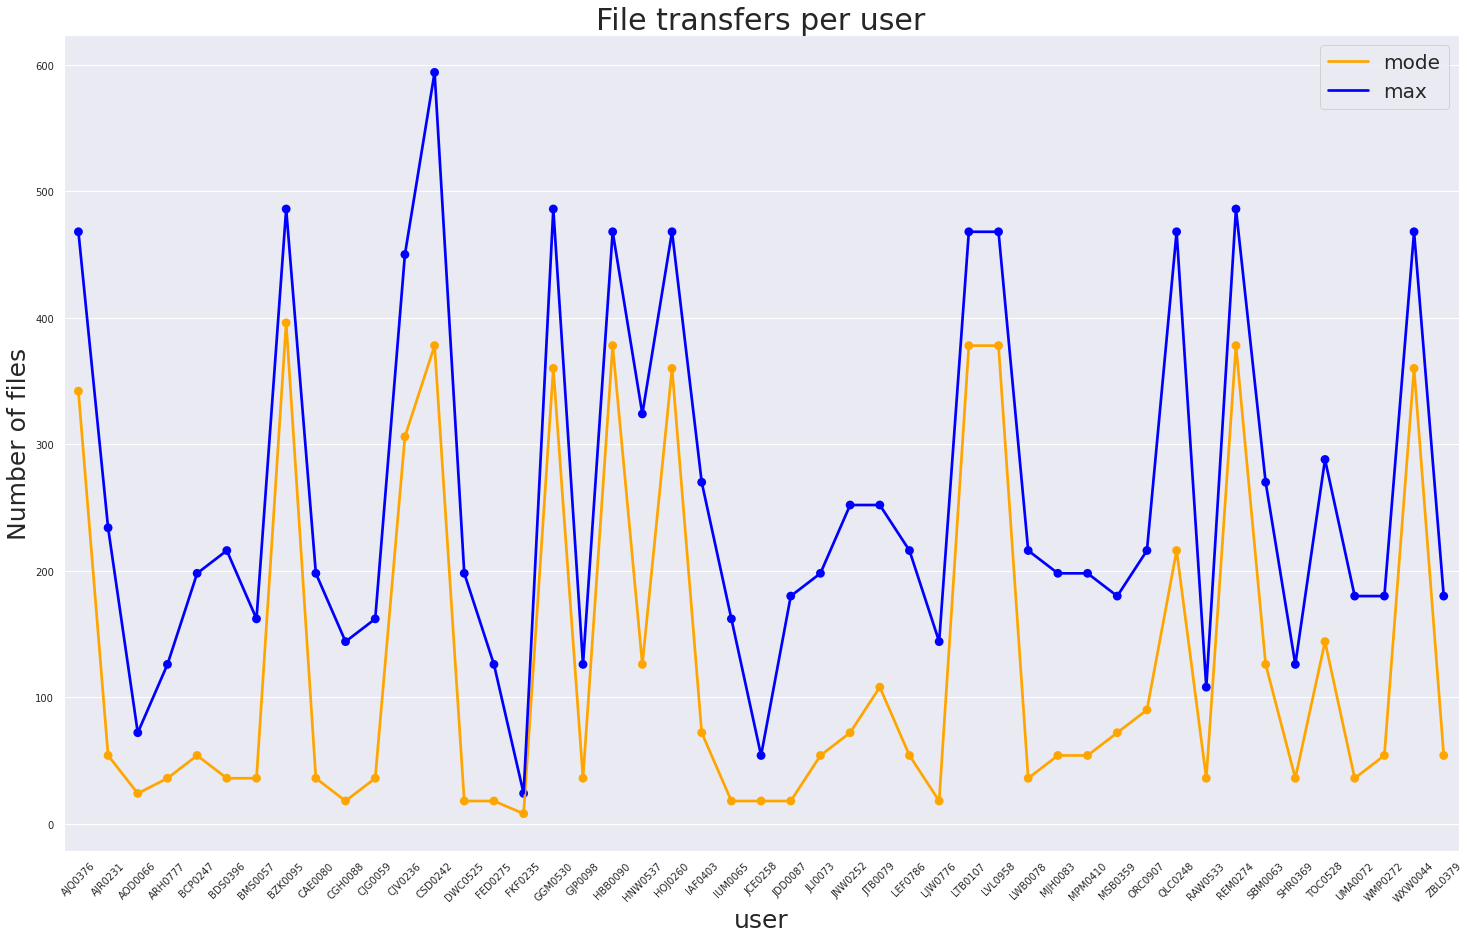

In [138]:
f, ax = plt.subplots(figsize = (25,15))
x_col='user'

sns.pointplot(ax=ax,x=x_col,y='mode_trasfers_per_user',data=df_files_stats_new, color='orange')
sns.pointplot(ax=ax,x=x_col,y='max_transfers_per_user',data=df_files_stats_new,color='blue')

ax.legend(handles=ax.lines[::len(df_files_stats)+1], labels=["mode", "max"], fontsize = 20)

ax.set_title('File transfers per user', size = 30)
plt.rcParams["axes.labelsize"] = 25
plt.ylabel("Number of files")
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
# plt.legend(fontsize=20)
plt.show()